## Task 1

In [2]:
#Import Essential Library for Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Loading Dataset for Overview Analysis

In [3]:
#Expand the rows and column for full views
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
# Load Dataset

warnings.filterwarnings('ignore')
tel_data=pd.read_excel('F:\\Data Science Course\\Interniship program\\Next Hikes.com\\Data\\telcom_data.xlsx')

tel_data.head(1000)

Bearer Id               Start  Start ms                 End  \
0    13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1    13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2    13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3    13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4    13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   
5    13114483499779198976 2019-04-12 21:37:31     439.0 2019-04-25 08:08:09   
6    13114483501243799552 2019-04-13 08:41:59     612.0 2019-04-25 08:16:21   
7    13042425910865399808 2019-04-14 02:11:59     592.0 2019-04-25 02:26:52   
8    13114483506432499712 2019-04-14 12:48:32     121.0 2019-04-25 10:22:26   
9    13042425914669299712 2019-04-15 00:32:15       0.0 2019-04-25 00:40:17   
10    7277825610512449536 2019-04-15 10:30:16      90.0 2019-04-25 06:14:13   
11   13114483557479700480 2019-04-15 11:33:39     626.0 2019-04-25 18:44:14   
12   13114483510574800896 2019-04-15 12:20:36     729.0 2019-04-25 08:40:02   
13   13042425955434700800 2019-04-15 14:58:29     609.0 2019-04-25 00:40:17   
14   13042425919178199040 2019-04-16 00:35:29     909.0 2019-04-25 00:40:17   
15    7277825621540039680 2019-04-16 08:56:59       2.0 2019-04-25 09:44:50   
16    7349883204890210304 2019-04-16 09:23:47     484.0 2019-04-25 06:39:09   
17   13114483514898100224 2019-04-16 11:34:35     259.0 2019-04-25 12:31:06   
18   13114483515252600832 2019-04-16 13:01:22     293.0 2019-04-25 13:14:29   
19   13114483516744800256 2019-04-16 18:59:54      41.0 2019-04-25 17:36:17   
20   13042425955912400896 2019-04-17 00:35:20     363.0 2019-04-25 04:52:49   
21   13042425923680399360 2019-04-17 00:35:33     326.0 2019-04-25 00:40:17   
22    7349883219580890112 2019-04-17 08:01:04     284.0 2019-04-25 17:02:58   
23   13114483518727299072 2019-04-17 08:37:19      93.0 2019-04-25 07:23:50   
24   13114483518962900992 2019-04-17 09:44:17     529.0 2019-04-25 15:22:22   
25   13114483519088500736 2019-04-17 10:17:52      47.0 2019-04-24 23:27:28   
26   13114483519357999104 2019-04-17 11:26:06     949.0 2019-04-25 18:27:51   
27   13114483520486600704 2019-04-17 16:00:50     423.0 2019-04-25 19:10:20   
28    7349883221410639872 2019-04-17 16:01:53     627.0 2019-04-25 17:10:59   
29   13042425926545700864 2019-04-17 16:23:16     537.0 2019-04-25 14:05:23   
30   13042425955912400896 2019-04-18 00:35:20     711.0 2019-04-25 04:52:49   
31    7349883223578449920 2019-04-18 06:04:16     124.0 2019-04-25 10:49:39   
32    7349883224028189696 2019-04-18 08:56:36     664.0 2019-04-25 07:41:07   
33   13114483523450300416 2019-04-18 09:26:55     588.0 2019-04-25 20:54:26   
34    7349883224187289600 2019-04-18 09:39:44     412.0 2019-04-25 06:22:26   
35   13114483523751600128 2019-04-18 10:45:52     327.0 2019-04-25 20:06:23   
36   13114483524120799232 2019-04-18 12:14:47     574.0 2019-04-25 12:31:47   
37    7349883225259190272 2019-04-18 14:10:08     947.0 2019-04-25 13:23:18   
38    7277825631581549568 2019-04-18 15:40:37     982.0 2019-04-25 15:40:38   
39   13114483552455200768 2019-04-18 15:54:45     387.0 2019-04-25 15:34:01   
40    7349883225706970112 2019-04-18 16:02:15     369.0 2019-04-25 09:08:38   
41    7349883226284239872 2019-04-18 18:17:41     856.0 2019-04-25 16:13:20   
42    7349883226350550016 2019-04-18 18:33:25      20.0 2019-04-25 00:25:32   
43   13042425959708299264 2019-04-19 02:55:04     809.0 2019-04-25 00:17:46   
44   13114483529006100480 2019-04-19 13:39:22     494.0 2019-04-25 17:19:18   
45    7349883229736559616 2019-04-19 14:45:51     391.0 2019-04-25 00:54:06   
46   13042425963456399360 2019-04-19 14:54:40     268.0 2019-04-25 19:42:00   
47    7349883230799620096 2019-04-19 18:56:27     556.0 2019-04-25 17:58:10   
48   13114483531236999168 2019-04-19 23:14:45     585.0 2019-04-25 02:22:14   
49    7349883231862670336 2019-04-20 00:42:18     155.0 2019-04-25

In [5]:
#Getting dataset features Information
tel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [6]:
# Know about rows and columns
tel_data.shape

(150001, 55)

### Top 10 handsets used by the Customers

In [7]:
# Get the top 10 Handsets by Customers
top10_handsets = tel_data['Handset Type'].value_counts().head(10)
top10_handsets

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

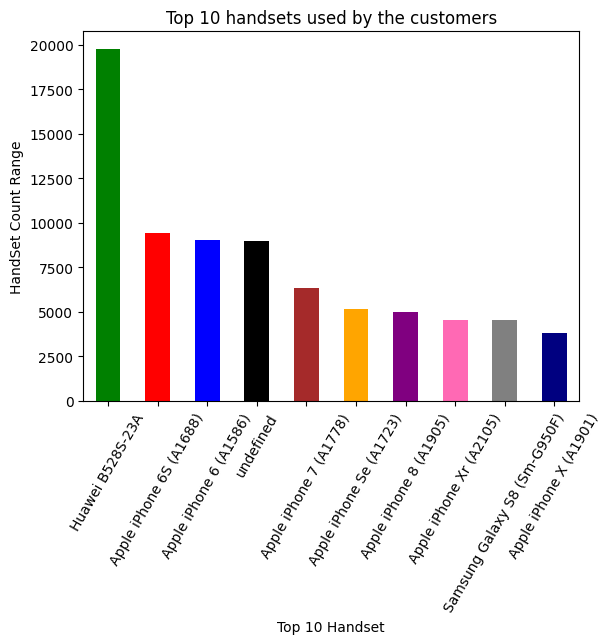

In [8]:
# Visualize the top 10 manufactures with different colors
colors = ['green', 'red', 'blue', 'black', 'brown', 'orange', 'purple', 'hotpink', 'gray', 'navy']
top10_handsets.plot(kind='bar',label='top 10 Handset type',color=colors)
plt.xlabel('Top 10 Handset')
plt.ylabel('HandSet Count Range')
plt.title('Top 10 handsets used by the customers')
plt.xticks(rotation=60)
plt.show()

### Top 3 Handset Manufacturers

In [9]:
# Get the top 3 manufacturers using value_count and head fuction
top3_mfg = tel_data['Handset Manufacturer'].value_counts().head(3)
top3_mfg

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [10]:
# Top 3 List using Index
top3_mfg.index

Index(['Apple', 'Samsung', 'Huawei'], dtype='object')

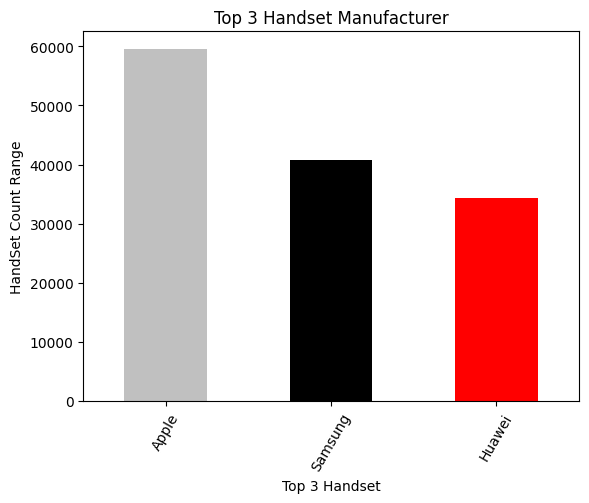

In [11]:
# Visualize the top 3 manufactures with different colors
colors = ['silver', 'black', 'red']
top3_mfg.plot(kind='bar',label='Handset type',color=colors)
plt.xticks(rotation=60)
plt.xlabel('Top 3 Handset')
plt.ylabel('HandSet Count Range')
plt.title('Top 3 Handset Manufacturer')
plt.xticks(rotation=60)
plt.show()

In [12]:
# Step 1: Filter the DataFrame for the top 3 manufacturers
filtered_data = tel_data[tel_data['Handset Manufacturer'].isin(top3_mfg.index)]

# Step 2: Group by Manufacturer and find the top 5 handsets for each group
top3_mfg_handsets = filtered_data.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0, group_keys=False).nlargest(5)

# Display the result
print(top3_mfg_handsets)


Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: Handset Typ

In [13]:
#Aggregate per user the number of xDR sessions, session duration, total download (DL) and upload (UL) data,
#and total data volume (in Bytes) during each session for each application.

def aggregate_per_user(df):

    # Group by 'MSISDN/Number'
    grouped_df = tel_data.groupby('MSISDN/Number')

    # Define aggregation functions
    aggregation_data = {
        'Bearer Id': 'count',            # Number of xDR sessions
        'Dur. (ms)': 'sum',              # Session duration
        'Total DL (Bytes)': 'sum',       # Total download data
        'Total UL (Bytes)': 'sum',       # Total upload data
        'Social Media DL (Bytes)': 'sum',  # Total data volume for each application
        'Social Media UL (Bytes)': 'sum',
        'Google DL (Bytes)': 'sum',
        'Google UL (Bytes)': 'sum',
        'Email DL (Bytes)': 'sum',
        'Email UL (Bytes)': 'sum',
        'Youtube DL (Bytes)': 'sum',
        'Youtube UL (Bytes)': 'sum',
        'Netflix DL (Bytes)': 'sum',
        'Netflix UL (Bytes)': 'sum',
        'Gaming DL (Bytes)': 'sum',
        'Gaming UL (Bytes)': 'sum',
        'Other DL (Bytes)': 'sum',
        'Other UL (Bytes)':'sum'
    }

    # Apply aggregation
    aggregated_df = grouped_df.agg(aggregation_data).reset_index()

    return aggregated_df
result_df = aggregate_per_user(tel_data)

# Display the result 1000  only due to limit issue.
print(result_df.head(1000))

     MSISDN/Number  Bearer Id  Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
0     3.360100e+10          1   116720.0      8.426375e+08        36053108.0   
1     3.360100e+10          1   181230.0      1.207552e+08        36104459.0   
2     3.360100e+10          1   134969.0      5.566597e+08        39306820.0   
3     3.360101e+10          1    49878.0      4.019932e+08        20327526.0   
4     3.360101e+10          2    37104.0      1.363130e+09        94280527.0   
5     3.360101e+10          2   253983.0      5.552080e+08        60009249.0   
6     3.360101e+10          2   128360.0      5.530412e+08       101681858.0   
7     3.360101e+10          1    86399.0      2.940851e+08        38575279.0   
8     3.360101e+10          2   495702.0      8.965602e+08        93572016.0   
9     3.360102e+10          1   124854.0      6.853728e+08        47091008.0   
10    3.360102e+10          1   248424.0      7.947336e+07        35502671.0   
11    3.360102e+10          1    38416.0

### Handling the missing Values

In [14]:
#Overview descriptive statistics about the data
tel_data.describe()

Start ms         End ms     Dur. (ms)          IMSI  \
count  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean      499.188200     498.800880  1.046086e+05  2.082016e+14   
std       288.611834     288.097653  8.103762e+04  2.148809e+10   
min         0.000000       0.000000  7.142000e+03  2.040471e+14   
25%       250.000000     251.000000  5.744050e+04  2.082014e+14   
50%       499.000000     500.000000  8.639900e+04  2.082015e+14   
75%       749.000000     750.000000  1.324302e+05  2.082018e+14   
max       999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e+13       619.782739        84.793524   
min     3.360100e+10  4.400152e+11         0.000000         0.000000   
25%     3.365130e+10  3.546071e+13        32.000000         2.000000   
50%     3.366371e+10  3.572201e+13        45.000000         5.000000   
75%     3.368349e+10  8.611970e+13        70.000000        15.000000   
max     8.823971e+14  9.900120e+13     96923.000000      7120.000000   

       Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
count            150000.000000            150000.000000   
mean              13300.045927              1770.428647   
std               23971.878541              4625.355500   
min                   0.000000                 0.000000   
25%                  43.000000                47.000000   
50%                  63.000000                63.000000   
75%               19710.750000              1120.000000   
max              378160.000000             58613.000000   

       TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
count                 6.185500e+04                 5.335200e+04   
mean                  2.080991e+07                 7.596587e+05   
std                   1.825665e+08                 2.645305e+07   
min                   2.000000e+00                 1.000000e+00   
25%                   3.565150e+04                 4.694750e+03   
50%                   5.687300e+05                 2.094950e+04   
75%                   3.768308e+06                 8.402025e+04   
max                   4.294426e+09                 2.908226e+09   

       DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
count        149247.000000                   149247.000000   
mean             92.844754                        3.069355   
std              13.038031                        6.215233   
min               0.000000                        0.000000   
25%              91.000000                        0.000000   
50%             100.000000                        0.000000   
75%             100.000000                        4.000000   
max             100.000000                       93.000000   

       250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
count                  149247.000000       149247.000000        149209.000000   
mean                        1.717341            1.609654            98.530142   
std                         4.159538            4.828890             4.634285   
min                         0.000000            0.000000             0.000000   
25%                         0.000000            0.000000            99.000000   
50%                         0.000000            0.000000           100.000000   
75%                         1.000000            0.000000           100.000000   
max                       100.000000           94.000000           100.000000   

       10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
count                  149209.000000                   149209.000000   
mean                        0.776749                        0.147987   
std                         3.225176                        1.624523   
min                         0.000000          

In [15]:
#Know about used data types in dataset
tel_data.dtypes

Bearer Id                                           object
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

In [16]:
#Find the missing value in dataset
tel_data.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [17]:
#Create function for Overall Mising Value in percetange

def percent_miss(df):
    #Calculating total number of cells in dataframe
    total_cells=np.product(tel_data.shape)
    
    #count the number of missing values per column
    missingcount=tel_data.isnull().sum()
    
    #calculate the total number of missing valies
    totalmissing = missingcount.sum()
    
    #Calculate the Percentage of missing value
    
    print('The Telecome dataset have contais: ', round((totalmissing/total_cells)*100,2),"%", "Mising Values")
    
percent_miss(tel_data)

The Telecome dataset have contais:  12.49 % Mising Values


In [18]:
# Total Missing percentage of Each Features
nul_percentage=tel_data.isnull().sum()/len(tel_data)*100
nul_percentage

Bearer Id                                    0.000000
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

In [19]:
#Drop the features if percentage greather than 50% missing value

def drop_na(df, max_percent):
    
    # Calculate the percentage value on each features
    nul_percentage=tel_data.isnull().sum()/len(tel_data)*100
    cal_feature=nul_percentage[nul_percentage>max_percent].index
    
    # Drop the null Features from dataframe
    drop_feature=df.drop(columns=cal_feature)

    # print info about dropped columns or features
    print(f"Dropped columns with null percentage > {max_percent}%: {list(cal_feature)}")
    return drop_feature

# Print the result with new dataset "filtere_data"
filtered_data=drop_na(tel_data,55)

Dropped columns with null percentage > 55%: ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B']


In [20]:
# Total Missing percentage of Each Features
nul_percentage=filtered_data.isnull().sum()/len(tel_data)*100
nul_percentage

Bearer Id                          0.000000
Start                              0.000667
Start ms                           0.000667
End                                0.000667
End ms                             0.000667
Dur. (ms)                          0.000667
IMSI                               0.379997
MSISDN/Number                      0.710662
IMEI                               0.381331
Last Location Name                 0.768662
Avg RTT DL (ms)                   18.552543
Avg RTT UL (ms)                   18.541210
Avg Bearer TP DL (kbps)            0.000667
Avg Bearer TP UL (kbps)            0.000667
DL TP < 50 Kbps (%)                0.502663
50 Kbps < DL TP < 250 Kbps (%)     0.502663
250 Kbps < DL TP < 1 Mbps (%)      0.502663
DL TP > 1 Mbps (%)                 0.502663
UL TP < 10 Kbps (%)                0.527996
10 Kbps < UL TP < 50 Kbps (%)      0.527996
50 Kbps < UL TP < 300 Kbps (%)     0.527996
UL TP > 300 Kbps (%)               0.527996
HTTP DL (Bytes)                 

In [21]:
# checked total number missing value
filtered_data.isnull().sum()

Bearer Id                             0
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
HTTP DL (Bytes)                   81474
HTTP UL (Bytes)                   81810
Activity Duration DL (ms)             1


In [22]:
#Create fuction to fill data type 

# Filling missing calues ith ffill method for all columns (except Bearer Id, Last Location Name, Handset Manufacturer, Handset Type)

def fix_missing_ffill(df, col):
  df[col] = df[col].fillna(method = 'ffill')
  return df[col]

def fix_missing_bfill(df, col):
  df[col] = df[col].fillna(method = 'bfill')
  return df[col]

In [23]:
# ffill and bfill method use to fill the missing cell value. 
filtered_data['Start']=fix_missing_ffill(filtered_data,'Start')
filtered_data['Start ms']=fix_missing_ffill(filtered_data,'Start ms')
filtered_data['End']=fix_missing_ffill(filtered_data,'End')
filtered_data['End ms']=fix_missing_ffill(filtered_data,'End ms')
filtered_data['Dur. (ms)']=fix_missing_ffill(filtered_data,'Dur. (ms)')
filtered_data['IMSI']=fix_missing_ffill(filtered_data,'IMSI')
filtered_data['MSISDN/Number']=fix_missing_ffill(filtered_data,'MSISDN/Number')
filtered_data['IMEI']=fix_missing_ffill(filtered_data,'IMEI')
filtered_data['Avg RTT DL (ms)']=fix_missing_ffill(filtered_data,'Avg RTT DL (ms)')
filtered_data['Avg RTT UL (ms)']=fix_missing_ffill(filtered_data,'Avg RTT UL (ms)')
filtered_data['Avg Bearer TP DL (kbps)']=fix_missing_ffill(filtered_data,'Avg Bearer TP DL (kbps)')
filtered_data['Avg Bearer TP UL (kbps)']=fix_missing_ffill(filtered_data,'Avg Bearer TP UL (kbps)')
filtered_data['DL TP < 50 Kbps (%)']=fix_missing_ffill(filtered_data,'DL TP < 50 Kbps (%)')
filtered_data['50 Kbps < DL TP < 250 Kbps (%)']=fix_missing_ffill(filtered_data,'50 Kbps < DL TP < 250 Kbps (%)')
filtered_data['250 Kbps < DL TP < 1 Mbps (%)']=fix_missing_ffill(filtered_data,'250 Kbps < DL TP < 1 Mbps (%)')
filtered_data['DL TP > 1 Mbps (%)']=fix_missing_ffill(filtered_data,'DL TP > 1 Mbps (%)')
filtered_data['UL TP < 10 Kbps (%)']=fix_missing_ffill(filtered_data,'UL TP < 10 Kbps (%)')
filtered_data['10 Kbps < UL TP < 50 Kbps (%)']=fix_missing_ffill(filtered_data,'10 Kbps < UL TP < 50 Kbps (%)')
filtered_data['50 Kbps < UL TP < 300 Kbps (%)']=fix_missing_ffill(filtered_data,'50 Kbps < UL TP < 300 Kbps (%)')
filtered_data['UL TP > 300 Kbps (%)']=fix_missing_ffill(filtered_data,'UL TP > 300 Kbps (%)')
filtered_data['HTTP DL (Bytes)']=fix_missing_ffill(filtered_data,'HTTP DL (Bytes)')
filtered_data['HTTP UL (Bytes)']=fix_missing_ffill(filtered_data,'HTTP UL (Bytes)')
filtered_data['Activity Duration DL (ms)']=fix_missing_ffill(filtered_data,'Activity Duration DL (ms)')
filtered_data['Activity Duration UL (ms)']=fix_missing_ffill(filtered_data,'Activity Duration UL (ms)')
filtered_data['Dur. (ms).1']=fix_missing_ffill(filtered_data,'Dur. (ms).1')
filtered_data['Nb of sec with Vol DL < 6250B']=fix_missing_ffill(filtered_data,'Nb of sec with Vol DL < 6250B')
filtered_data['Nb of sec with Vol UL < 1250B']=fix_missing_ffill(filtered_data,'Nb of sec with Vol UL < 1250B')
filtered_data['Total UL (Bytes)']=fix_missing_ffill(filtered_data,'Total UL (Bytes)')
filtered_data['Total DL (Bytes))']=fix_missing_ffill(filtered_data,'Total DL (Bytes)')

In [24]:
# Using mode and mean to file the below missing value
#Mode:
filtered_data['Last Location Name'] = filtered_data['Last Location Name'].fillna(filtered_data['Last Location Name'].mode()[0])
filtered_data['Handset Manufacturer'] = filtered_data['Handset Manufacturer'].fillna(filtered_data['Handset Manufacturer'].mode()[0])
filtered_data['Handset Type'] = filtered_data['Handset Type'].fillna(filtered_data['Handset Type'].mode()[0])

#Mean:
filtered_data['HTTP DL (Bytes)'] = filtered_data['HTTP DL (Bytes)'].fillna(filtered_data['HTTP DL (Bytes)'].mean())
filtered_data['HTTP UL (Bytes)'] = filtered_data['HTTP UL (Bytes)'].fillna(filtered_data['HTTP UL (Bytes)'].mean())

In [25]:
#Copy the filled missing data in below dataset
cleaned_data=filtered_data.copy()

In [26]:
#Checked missing value again after filling value
cleaned_data.isnull().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
HTTP DL (Bytes)                   0
HTTP UL (Bytes)                   0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer        

In [27]:
quantitative_variables = filtered_data.select_dtypes(include=['int','float']).columns

# Display the list of quantitative variables
print("Quantitative Variables:",quantitative_variables.shape[0])
print(quantitative_variables.tolist())

Quantitative Variables: 42
['Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)', 'Total DL (Bytes))']


### Scaling and Normalization

In [28]:
#Scaling
from sklearn.preprocessing import MinMaxScaler

minmaxscaler=MinMaxScaler()

tel_data=pd.DataFrame(np.random.exponential(200,size=20000))
tel_data.sample(10)

0
16105  141.542909
179     22.556896
16578  195.588421
11265   59.976346
10382   24.475151
4655   568.126440
3318   391.413271
3      555.788863
9482   129.175325
14007  155.649424

In [29]:
tel_data[0].min(), tel_data[0].max()

(0.06043450251246151, 1822.9465332737955)

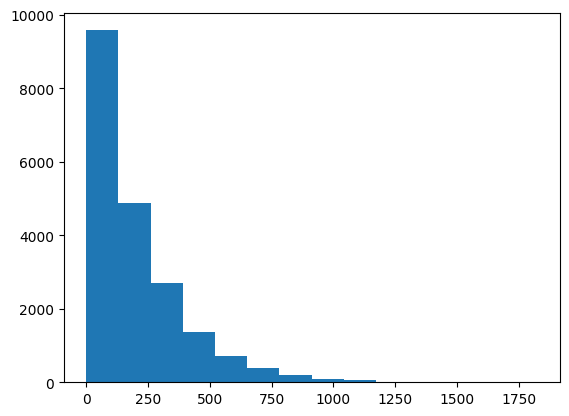

In [30]:
count,bins,ingnored=plt.hist(tel_data,14)
plt.show()

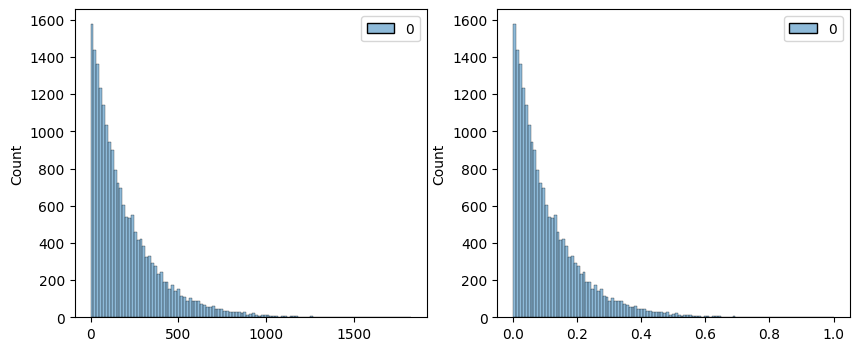

In [31]:
# min-max scale the data between 0 and 1
def scaler(df):
    scaled_data=minmaxscaler.fit_transform(df)
    
    #plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10,4))
    sns.histplot(tel_data, ax=ax[0])
    ax[0].set_title=('Original Data')
    sns.histplot(scaled_data,ax=ax[1])
    ax[1].set_title=('Scaled Data')

scaler(tel_data)

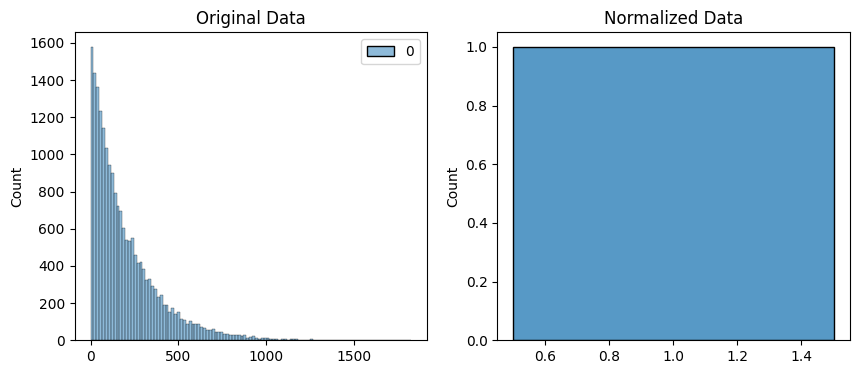

In [32]:
#Normalization

from sklearn.preprocessing import Normalizer
def normalize(df):
    norm=Normalizer()
    
    #Normalize the exponential data
    normed_data=norm.fit_transform(df)
    
    #plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10,4))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title('Original Data')
    
    sns.histplot(normed_data[0], ax=ax[1])
    ax[1].set_title('Normalized Data')
    
normalize(tel_data)

In [33]:
# Detect outliers using zscore method
from scipy.stats import zscore

def check_outliers(df, columns, threshold=3):
    
    outliers_info = {}

    for col in columns:
        # Calculate Z-scores
        z_scores = zscore(df[col])

        # Identify outliers using the Z-score threshold
        outliers = df[(z_scores > threshold) | (z_scores < -threshold)]

        # Save outlier information in the dictionary
        if not outliers.empty:
            outliers_info[col] = {
                'outliers_count': len(outliers),
                'outliers_indices': outliers.index.tolist()
            }

    return outliers_info

# Example usage:
# Assuming 'your_dataframe' is your DataFrame and ['column1', 'column2'] are the columns to check
# Adjust the columns and DataFrame accordingly
outliers_result = check_outliers(cleaned_data, ['Start ms', 'End ms', 'Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)', 'Total DL (Bytes))'])

# Display the results
for col, info in outliers_result.items():
    print(f"Outliers in '{col}':")
    print(f"Count: {info['outliers_count']}")
    print(f"Indices: {info['outliers_indices']}")
    print("\n")


Outliers in 'Dur. (ms)':
Count: 2214
Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 76, 77, 25000, 25001, 25002, 25003, 25004, 25005, 25006, 25007, 25008, 25009, 25010, 25011, 25012, 25013, 25014, 25015, 25016, 25017, 25018, 25019, 25020, 25021, 25022, 25023, 25024, 25025, 25026, 25027, 25028, 25029, 25030, 25031, 25032, 25033, 25034, 25035, 25036, 25037, 25038, 25039, 25040, 25041, 25042, 25043, 25044, 25045, 25046, 25047, 25048, 25049, 25050, 25051, 25052, 25053, 25054, 25055, 25056, 25057, 25058, 25059, 25060, 25061, 25062, 25063, 25064, 25065, 25066, 25067, 25068, 25069, 25070, 25071, 25072, 25073, 25074, 25075, 25076, 25077, 25078, 25079, 25080, 25081, 25082, 25083, 25084, 25085, 25086, 25087, 25088, 25089, 25090, 25091, 25092, 25093, 25094, 25095, 25096, 25097, 25098, 25099,

In [34]:
import pandas as pd
from scipy.stats import zscore

def floor_cap_outliers(df, column, floor_value=None, cap_value=None, zscore_threshold=3):
    """
    Floor and cap outliers in a specified column of a DataFrame.

    Parameters:
    - column: Column name to floor and cap outliers
    - floor_value: Minimum allowed value for the column (None if no floor)
    - cap_value: Maximum allowed value for the column (None if no cap)
    - zscore_threshold: Z-score threshold for identifying outliers

    Returns:
    - DataFrame with outliers floored and capped in the specified column
    """
    # Calculate Z-scores
    z_scores = zscore(df[column])

    # Identify outliers using the Z-score threshold
    outliers = df[(z_scores > zscore_threshold) | (z_scores < -zscore_threshold)]

    # Floor and cap outliers based on the calculated limits
    if floor_value is not None:
        df[column] = df[column].apply(lambda x: floor_value if x < floor_value else x)

    if cap_value is not None:
        df[column] = df[column].apply(lambda x: cap_value if x > cap_value else x)

    return df

# Function to calculate lower and upper limits for each column
def calculate_limits(df, columns, lower_quantile=0.01, upper_quantile=0.99):
    """
    Calculate lower and upper limits for specified columns based on quantiles.

    Parameters:
    - columns: List of column names to calculate limits for
    - lower_quantile: Lower quantile for flooring (default is 0.01)
    - upper_quantile: Upper quantile for capping (default is 0.99)

    Returns:
    - Dictionary containing lower and upper limits for each specified column
    """
    limits_dict = {}

    for column in columns:
        lower_limit = df[column].quantile(lower_quantile)
        upper_limit = df[column].quantile(upper_quantile)
        limits_dict[column] = {'lower_limit': lower_limit, 'upper_limit': upper_limit}

    return limits_dict

# Specify the columns for flooring and capping
columns_to_floor_cap = [
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
    'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
    'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
    '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
    'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
    'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Total UL (Bytes)'
]

# Calculate lower and upper limits for each specified column
limits_dict = calculate_limits(cleaned_data, columns_to_floor_cap)

# Apply the function for each specified column
for column in columns_to_floor_cap:
    lower_limit = limits_dict[column]['lower_limit']
    upper_limit = limits_dict[column]['upper_limit']
    cleaned_data = floor_cap_outliers(cleaned_data, column, floor_value=lower_limit, cap_value=upper_limit)

# Display the modified DataFrame with 100 records
print(cleaned_data.head(100))


               Bearer Id               Start  Start ms                 End  \
0   13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1   13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2   13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3   13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4   13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   
5   13114483499779198976 2019-04-12 21:37:31     439.0 2019-04-25 08:08:09   
6   13114483501243799552 2019-04-13 08:41:59     612.0 2019-04-25 08:16:21   
7   13042425910865399808 2019-04-14 02:11:59     592.0 2019-04-25 02:26:52   
8   13114483506432499712 2019-04-14 12:48:32     121.0 2019-04-25 10:22:26   
9   13042425914669299712 2019-04-15 00:32:15       0.0 2019-04-25 00:40:17   
10   7277825610512449536 2019-04-15 10:30:16      90.0 2019-04-25 06:14:13   
11  13114483557479700480 2019-04-15 11:33:39     626.0 2019-04-2

In [35]:
#Checked the duplicate row in Dataset
cleaned_data.duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
32        False
33        False
34        False
35        False
36        False
37        False
38        False
39        False
40        False
41        False
42        False
43        False
44        False
45        False
46        False
47        False
48        False
49        False
50        False
51        False
52        False
53        False
54        False
55        False
56        False
57        False
58        False
59        False
60        False
61        False
62      

In [36]:
#Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable
dispersion_parameters =cleaned_data.quantile([0.25, 0.5, 0.75]).T
print(dispersion_parameters)

                                        0.25          0.50          0.75
Start ms                        2.500000e+02  4.990000e+02  7.490000e+02
End ms                          2.510000e+02  5.000000e+02  7.500000e+02
Dur. (ms)                       5.744200e+04  8.639900e+04  1.324300e+05
IMSI                            2.082014e+14  2.082015e+14  2.082018e+14
MSISDN/Number                   3.365128e+10  3.366370e+10  3.368345e+10
IMEI                            3.546071e+13  3.572201e+13  8.611970e+13
Avg RTT DL (ms)                 3.100000e+01  4.400000e+01  6.700000e+01
Avg RTT UL (ms)                 2.000000e+00  5.000000e+00  1.300000e+01
Avg Bearer TP DL (kbps)         4.300000e+01  6.300000e+01  1.971000e+04
Avg Bearer TP UL (kbps)         4.700000e+01  6.300000e+01  1.120000e+03
DL TP < 50 Kbps (%)             9.100000e+01  1.000000e+02  1.000000e+02
50 Kbps < DL TP < 250 Kbps (%)  0.000000e+00  0.000000e+00  4.000000e+00
250 Kbps < DL TP < 1 Mbps (%)   0.000000e+00  0.000

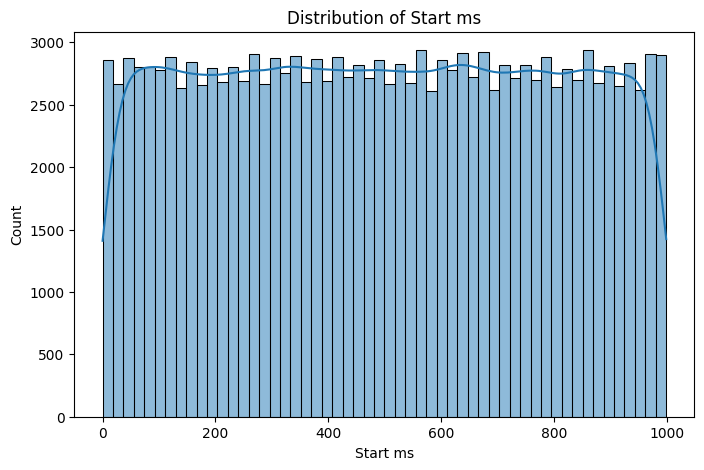

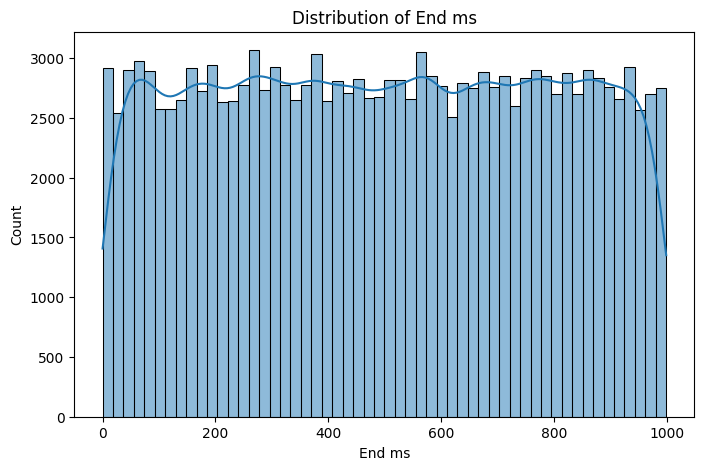

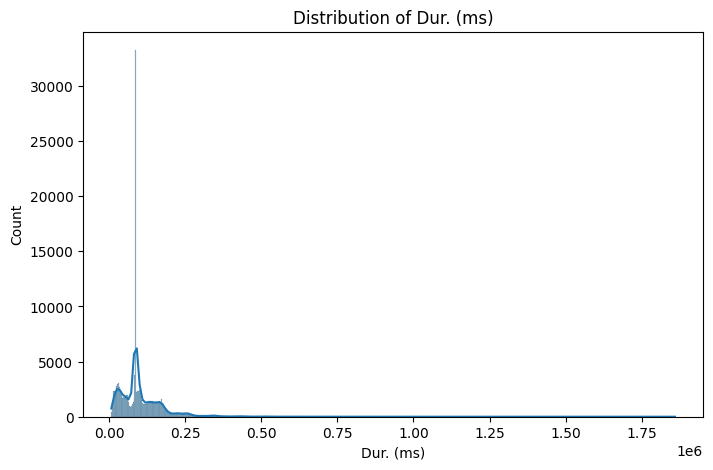

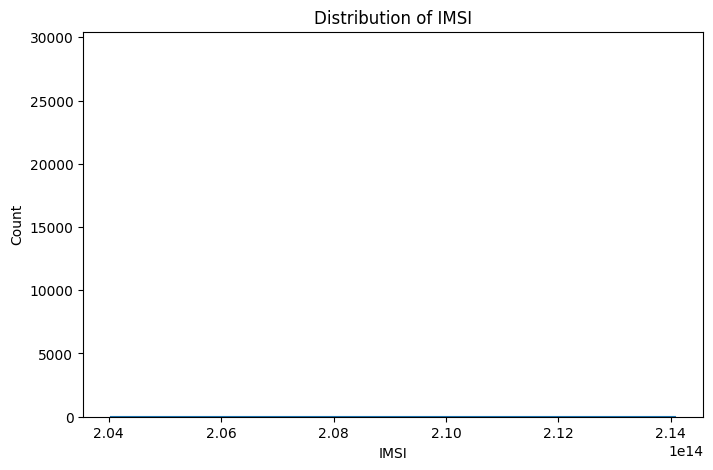

MemoryError: Unable to allocate 5.43 GiB for an array with shape (728533308,) and data type float64

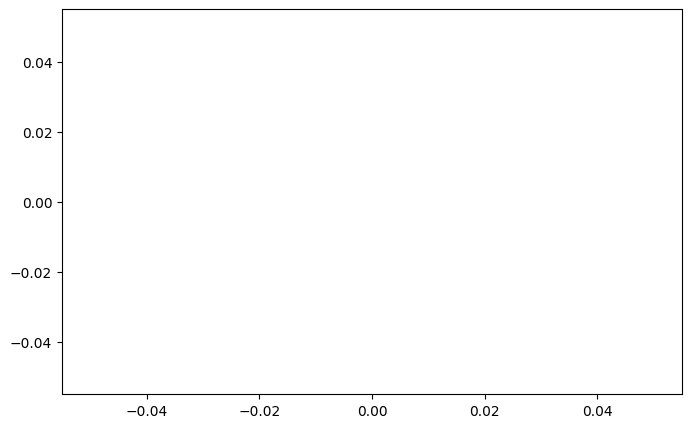

In [37]:
# Graphical Univariate Analysis by identifying the most suitable plotting options
for column in cleaned_data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(cleaned_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [ ]:
#Compile both colum volum in one using fuction
def compile_in_new_column(df, column1,column2,new_column_name):
    # Sum the values of val1 and val2 and create a new column
    df[new_column_name] = df[column1] + df[column2]
    
    return df

# Call the function

cleaned_data=compile_in_new_column(cleaned_data,'Total DL (Bytes)','Total UL (Bytes)','Total DL+UL')

In [ ]:
cleaned_data=compile_in_new_column(cleaned_data, 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Social Media')
cleaned_data=compile_in_new_column(cleaned_data, 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Netflix')
cleaned_data=compile_in_new_column(cleaned_data, 'Google DL (Bytes)', 'Google UL (Bytes)', 'Google')
cleaned_data=compile_in_new_column(cleaned_data, 'Email UL (Bytes)', 'Email UL (Bytes)', 'Email')
cleaned_data=compile_in_new_column(cleaned_data, 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Gaming')
cleaned_data=compile_in_new_column(cleaned_data, 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Youtube')
cleaned_data=compile_in_new_column(cleaned_data, 'Other DL (Bytes)', 'Other UL (Bytes)', 'Other')

In [ ]:
cleaned_data.head(10)

In [ ]:
#Bivariate Analaysis with Scatter plot seeing the relationship between two variables
for app in ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=app, y='Total DL+UL', data=cleaned_data)
    plt.title(f'Relationship between {app} data and Total DL+UL')
    plt.show()

In [ ]:
# Specify the bin edges with a small offset to avoid duplicates
bin_edges = [7142., 28066., 45960., 72290., 86399.1, 86400.1, 92515., 115969., 148355., 181414., 1859336.1]
cleaned_data['DurationDecile'] = pd.cut(cleaned_data['Dur. (ms)'], bins=bin_edges, labels=False, include_lowest=True)

# Convert the 'Total DL+UL' column to numeric if it's not already
cleaned_data['Total DL+UL'] = pd.to_numeric(cleaned_data['Total DL+UL'], errors='coerce')

# Group by 'DurationDecile' and calculate the sum of 'Total DL+UL' for each decile
total_data_per_decile = cleaned_data.groupby('DurationDecile')['Total DL+UL'].sum()

print(total_data_per_decile)


In [ ]:
# Correlation Coefficient
correlation_matrix = cleaned_data[['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']].corr()
print(correlation_matrix)


In [ ]:
# Dimensionality Reduction - Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numeric columns for PCA
numeric_columns = cleaned_data.select_dtypes(include=['float64', 'int64']).columns
data_for_pca = cleaned_data[numeric_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Interpretation
interpretation = [
    "The first principal component explains {:.2%} of the variance in the data.".format(explained_variance_ratio[0]),
    "The second principal component explains {:.2%} of the variance in the data.".format(explained_variance_ratio[1]),
    "The cumulative variance explained by the first two components is {:.2%}.".format(sum(explained_variance_ratio[:2])),
    "These principal components can be interpreted as a combination of the original features that capture the most significant patterns in the data."
]

# Print interpretation
for point in interpretation:
    print(point)


In [ ]:
cleaned_data.to_excel('F:\\Data Science Course\\Interniship program\\Next Hikes.com\\Data\\cleaned_data.xlsx',index=False)

## Task 2